In [1]:
import torch
from torch import Tensor, tanh
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# deactivate grad
torch.set_grad_enabled( False )

# Data

Create a dataset of 1000 points with label 0 if outside the disk of radius 1/√2π and 1 inside

In [3]:
def generate_disc_set(nb):
    input = Tensor(nb, 2).uniform_(-1, 1)
    target = 1-input.pow(2).sum(1).sub(2 / math.pi).sign().add(1).div(2).long()
    return input, target

In [4]:
def plot_dataset(train_input,train_target):
    Label=train_target.view(-1).float() # 1- to display the other label
    x1=(train_input.narrow(1,0,1).view(-1)*Label).numpy();
    y1=(train_input.narrow(1,1,1).view(-1)*Label).numpy();
    x0=(train_input.narrow(1,0,1).view(-1)*(1-Label)).numpy();
    y0=(train_input.narrow(1,1,1).view(-1)*(1-Label)).numpy();
    plt.figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')

    subplot=plt.subplot(1,2,1)
    axes = plt.gca();
    plt.title("Showing the dataset with the label 1");
    subplot.plot(x1,y1,'go');
    axes.set_xlim([-2,2]);
    axes.set_ylim([-2,2]);
    subplot=plt.subplot(1,2,2)
    axes = plt.gca();
    plt.title("Showing the dataset with the label 0");
    subplot.plot(x0,y0,'go');
    axes.set_xlim([-2,2]);
    axes.set_ylim([-2,2]);
    return subplot

In [5]:
train_input, train_target = generate_disc_set(1000);
test_input, test_target = generate_disc_set(1000);

mean, std = train_input.mean(), train_input.std();

train_input.sub_(mean).div_(std);
test_input.sub_(mean).div_(std);

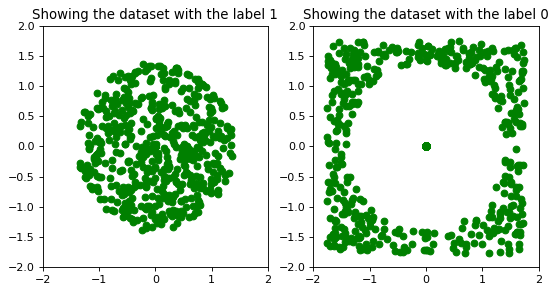

In [7]:
plot_Dataset(train_input, train_target)

# Module Class

In [10]:
# heritage module definition
class Module(object):
    def __init__(self):
        super().__init__()
        self.lr = 0
    def forward(self, *input) :
        raise NotImplementedError
    def backward(self, *gradwrtoutput):
        raise NotImplementedError
    def param(self):
        return []